In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import io


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 700_Task2_dataset.xlsx to 700_Task2_dataset.xlsx


In [3]:
data = pd.read_excel(io.BytesIO(uploaded['700_Task2_dataset.xlsx']))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23800 entries, 0 to 23799
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             23800 non-null  object 
 1   Fertility        23800 non-null  object 
 2   Photoperiod      23800 non-null  object 
 3   N-P-K Ratio      23800 non-null  object 
 4   Temperature      23800 non-null  float64
 5   Rainfall         23800 non-null  float64
 6   pH               23800 non-null  float64
 7   Light_Hours      23800 non-null  float64
 8   Light_Intensity  23800 non-null  float64
 9   Rh               23800 non-null  float64
 10  Nitrogen         23800 non-null  float64
 11  Phosphorus       23800 non-null  float64
 12  Potassium        23800 non-null  float64
 13  Yield            23800 non-null  float64
 14  Category_pH      23800 non-null  object 
 15  Soil_Type        23800 non-null  object 
 16  Season           23800 non-null  object 
 17  Crop_Variety

In [4]:
data.describe()

,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield
count,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000
mean,21.978474,1048.775960,6.238701,10.708792,428.144454,75.633995,143.077870,97.729048,178.380374,17.792950
std,4.382708,372.439104,0.836081,2.705223,210.594866,19.199301,60.180291,69.558537,90.676584,14.503704
min,9.355908,409.927161,2.940351,5.044913,66.000791,29.877266,40.077805,13.155191,34.982329,0.770213
25%,18.802279,756.618244,6.029328,7.479604,261.001150,55.986653,107.077056,47.208312,117.856142,6.309919
50%,21.424851,995.841172,6.431525,12.016017,403.601654,87.133888,140.252517,70.558185,174.455784,15.916217
75%,24.725214,1204.581048,6.691918,13.026169,573.610828,92.460093,163.848126,129.055964,223.645110,23.618085
max,39.913892,2786.343754,8.219020,16.721979,1028.679529,99.927439,409.639573,360.043619,579.953931,66.619242


In [5]:
# Display the Value counts and the # of unique values for each Categorical column
for column in data.select_dtypes(include=['object']):
    print(data[column].value_counts())
    print("Unique values for each class:"+ str(data[column].nunique()))
    print('-'*30)

Name
Arugula           700
Eggplants         700
Watermelon        700
Grapes            700
apricot           700
pear              700
plum              700
Tomatoes          700
Asparagus         700
Beet              700
Chilli Peppers    700
Cabbage           700
Cucumbers         700
Potatoes          700
Cauliflowers      700
Broccoli          700
Kiwi              700
Lemon             700
Cherries          700
Figs              700
Strawberry        700
Blueberry         700
Peach             700
Pomegranate       700
Orange            700
Apple             700
Spinach           700
Radicchio         700
Lettuce           700
Kale              700
Endive            700
Cress             700
Chard             700
Green Peas        700
Name: count, dtype: int64
Unique values for each class:34
------------------------------
Fertility
High        14000
Moderate     6300
moderate     3500
Name: count, dtype: int64
Unique values for each class:3
------------------------------
Photop

In [6]:
# Replace 'Sandy_loam' with 'Sandy_Loam'
data['Soil_Type'] = data['Soil_Type'].replace('Sandy loam', 'Sandy Loam')
data['Fertility'] = data['Fertility'].replace('moderate', 'Moderate')

In [7]:
# Display the Value counts and the # of unique values for each Categorical column
for column in data.select_dtypes(include=['object']):
    print(data[column].value_counts())
    print("Unique values for each class:"+ str(data[column].nunique()))
    print('-'*30)

Name
Arugula           700
Eggplants         700
Watermelon        700
Grapes            700
apricot           700
pear              700
plum              700
Tomatoes          700
Asparagus         700
Beet              700
Chilli Peppers    700
Cabbage           700
Cucumbers         700
Potatoes          700
Cauliflowers      700
Broccoli          700
Kiwi              700
Lemon             700
Cherries          700
Figs              700
Strawberry        700
Blueberry         700
Peach             700
Pomegranate       700
Orange            700
Apple             700
Spinach           700
Radicchio         700
Lettuce           700
Kale              700
Endive            700
Cress             700
Chard             700
Green Peas        700
Name: count, dtype: int64
Unique values for each class:34
------------------------------
Fertility
High        14000
Moderate     9800
Name: count, dtype: int64
Unique values for each class:2
------------------------------
Photoperiod
Short Day Pe

In [8]:
data

,Name,Fertility,Photoperiod,N-P-K Ratio,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield,Category_pH,Soil_Type,Season,Crop_Variety
0,Arugula,Moderate,Day Neutral,10:10:10,21.548532,699.563355,7.381288,10.006622,269.335666,38.919672,171.791515,340.391736,156.457930,7.237801,low_alkaline,Loamy,Spring,Salad
1,Arugula,Moderate,Short Day Period,10:10:10,19.298389,749.428170,7.321708,11.000313,239.786029,34.927492,164.366081,348.886089,160.173049,6.087718,low_alkaline,Loamy,Fall,Salad
2,Arugula,Moderate,Day Neutral,10:10:10,18.991317,656.690373,7.554360,10.965849,261.518595,34.583692,164.214463,343.759746,165.870562,6.783860,neutral,Loamy,Spring,Salad
3,Arugula,Moderate,Short Day Period,10:10:10,20.419960,709.012173,7.704955,11.152423,354.945367,36.148492,159.569223,340.213627,168.965350,7.224482,neutral,Loamy,Fall,Salad
4,Arugula,Moderate,Short Day Period,10:10:10,18.801426,814.762481,7.606352,10.719763,231.398738,33.129928,159.936051,351.118066,160.692004,6.149553,neutral,Loamy,Spring,Salad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23795,Green Peas,Moderate,Short Day Period,05:10:10,18.237489,1079.572958,6.777649,6.913269,314.935840,65.057374,150.515721,48.860186,124.688035,4.977256,neutral,Sandy,Fall,Vegetable
23796,Green Peas,Moderate,Short Day Period,05:10:10,16.603638,958.201820,5.839441,6.829060,345.860296,66.747340,144.310767,44.647790,121.589160,4.987133,neutral,Sandy,Fall,Vegetable
23797,Green Peas,Moderate,Short Day Period,05:10:10,12.154144,947.899222,6.499094,6.938902,320.293737,65.803531,147.068405,42.351771,120.392912,5.043142,low_acidic,Sandy,Fall,Vegetable
23798,Green Peas,Moderate,Short Day Period,05:10:10,17.493029,863.902923,5.940159,6.778806,300.501265,64.563183,144.416616,44.405726,119.291683,4.687349,low_acidic,Sandy,Spring,Vegetable


In [ ]:
data=data.drop(["pH","Yield"],axis='columns')

In [11]:
data = data.drop(["Crop_Variety"], axis = 'columns')
data.head(5)

,Name,Fertility,Photoperiod,N-P-K Ratio,Temperature,Rainfall,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Category_pH,Soil_Type,Season
0,Arugula,Moderate,Day Neutral,10:10:10,21.548532,699.563355,10.006622,269.335666,38.919672,171.791515,340.391736,156.457930,low_alkaline,Loamy,Spring
1,Arugula,Moderate,Short Day Period,10:10:10,19.298389,749.428170,11.000313,239.786029,34.927492,164.366081,348.886089,160.173049,low_alkaline,Loamy,Fall
2,Arugula,Moderate,Day Neutral,10:10:10,18.991317,656.690373,10.965849,261.518595,34.583692,164.214463,343.759746,165.870562,neutral,Loamy,Spring
3,Arugula,Moderate,Short Day Period,10:10:10,20.419960,709.012173,11.152423,354.945367,36.148492,159.569223,340.213627,168.965350,neutral,Loamy,Fall
4,Arugula,Moderate,Short Day Period,10:10:10,18.801426,814.762481,10.719763,231.398738,33.129928,159.936051,351.118066,160.692004,neutral,Loamy,Spring


In [24]:
X_data = data.drop(['Name'], axis = 'columns')
X_data.head(5)

,Fertility,Photoperiod,N-P-K Ratio,Temperature,Rainfall,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Category_pH,Soil_Type,Season
0,Moderate,Day Neutral,10:10:10,21.548532,699.563355,10.006622,269.335666,38.919672,171.791515,340.391736,156.457930,low_alkaline,Loamy,Spring
1,Moderate,Short Day Period,10:10:10,19.298389,749.428170,11.000313,239.786029,34.927492,164.366081,348.886089,160.173049,low_alkaline,Loamy,Fall
2,Moderate,Day Neutral,10:10:10,18.991317,656.690373,10.965849,261.518595,34.583692,164.214463,343.759746,165.870562,neutral,Loamy,Spring
3,Moderate,Short Day Period,10:10:10,20.419960,709.012173,11.152423,354.945367,36.148492,159.569223,340.213627,168.965350,neutral,Loamy,Fall
4,Moderate,Short Day Period,10:10:10,18.801426,814.762481,10.719763,231.398738,33.129928,159.936051,351.118066,160.692004,neutral,Loamy,Spring


In [25]:
y_data = data['Name']
y_data

0           Arugula
1           Arugula
2           Arugula
3           Arugula
4           Arugula
            ...    
23795    Green Peas
23796    Green Peas
23797    Green Peas
23798    Green Peas
23799    Green Peas
Name: Name, Length: 23800, dtype: object

In [26]:
X_data['N-P-K Ratio'] = X_data['N-P-K Ratio'].astype(str)
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23800 entries, 0 to 23799
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fertility        23800 non-null  object 
 1   Photoperiod      23800 non-null  object 
 2   N-P-K Ratio      23800 non-null  object 
 3   Temperature      23800 non-null  float64
 4   Rainfall         23800 non-null  float64
 5   Light_Hours      23800 non-null  float64
 6   Light_Intensity  23800 non-null  float64
 7   Rh               23800 non-null  float64
 8   Nitrogen         23800 non-null  float64
 9   Phosphorus       23800 non-null  float64
 10  Potassium        23800 non-null  float64
 11  Category_pH      23800 non-null  object 
 12  Soil_Type        23800 non-null  object 
 13  Season           23800 non-null  object 
dtypes: float64(8), object(6)
memory usage: 2.5+ MB


In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
column_transformer = make_column_transformer(
    (OneHotEncoder(), ['Fertility', 'Photoperiod', 'N-P-K Ratio', 'Category_pH', 'Soil_Type', 'Season']),
    remainder='passthrough')
X_data = column_transformer.fit_transform(X_data)
X_data = pd.DataFrame(data=X_data, columns=column_transformer.get_feature_names_out())
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23800 entries, 0 to 23799
Data columns (total 33 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   onehotencoder__Fertility_High                23800 non-null  float64
 1   onehotencoder__Fertility_Moderate            23800 non-null  float64
 2   onehotencoder__Photoperiod_Day Neutral       23800 non-null  float64
 3   onehotencoder__Photoperiod_Long Day Period   23800 non-null  float64
 4   onehotencoder__Photoperiod_Short Day Period  23800 non-null  float64
 5   onehotencoder__N-P-K Ratio_05:10:05          23800 non-null  float64
 6   onehotencoder__N-P-K Ratio_05:10:10          23800 non-null  float64
 7   onehotencoder__N-P-K Ratio_06:06:06          23800 non-null  float64
 8   onehotencoder__N-P-K Ratio_08:15:36          23800 non-null  float64
 9   onehotencoder__N-P-K Ratio_10:10:10          23800 non-null  float64
 10

In [28]:
X_data

,onehotencoder__Fertility_High,onehotencoder__Fertility_Moderate,onehotencoder__Photoperiod_Day Neutral,onehotencoder__Photoperiod_Long Day Period,onehotencoder__Photoperiod_Short Day Period,onehotencoder__N-P-K Ratio_05:10:05,onehotencoder__N-P-K Ratio_05:10:10,onehotencoder__N-P-K Ratio_06:06:06,onehotencoder__N-P-K Ratio_08:15:36,onehotencoder__N-P-K Ratio_10:10:10,...,onehotencoder__Season_Summer,onehotencoder__Season_Winter,remainder__Temperature,remainder__Rainfall,remainder__Light_Hours,remainder__Light_Intensity,remainder__Rh,remainder__Nitrogen,remainder__Phosphorus,remainder__Potassium
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,21.548532,699.563355,10.006622,269.335666,38.919672,171.791515,340.391736,156.457930
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,19.298389,749.428170,11.000313,239.786029,34.927492,164.366081,348.886089,160.173049
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,18.991317,656.690373,10.965849,261.518595,34.583692,164.214463,343.759746,165.870562
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,20.419960,709.012173,11.152423,354.945367,36.148492,159.569223,340.213627,168.965350
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,18.801426,814.762481,10.719763,231.398738,33.129928,159.936051,351.118066,160.692004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23795,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,18.237489,1079.572958,6.913269,314.935840,65.057374,150.515721,48.860186,124.688035
23796,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,16.603638,958.201820,6.829060,345.860296,66.747340,144.310767,44.647790,121.589160
23797,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,12.154144,947.899222,6.938902,320.293737,65.803531,147.068405,42.351771,120.392912
23798,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,17.493029,863.902923,6.778806,300.501265,64.563183,144.416616,44.405726,119.291683


In [29]:
def rename_columns(col):
    if col.startswith('remainder_'):
        return col.replace('remainder__', '')  # Remove the 'remainder_' prefix
    return col

X_data.columns = [rename_columns(col) for col in X_data.columns]
X_data.head(5)

,onehotencoder__Fertility_High,onehotencoder__Fertility_Moderate,onehotencoder__Photoperiod_Day Neutral,onehotencoder__Photoperiod_Long Day Period,onehotencoder__Photoperiod_Short Day Period,onehotencoder__N-P-K Ratio_05:10:05,onehotencoder__N-P-K Ratio_05:10:10,onehotencoder__N-P-K Ratio_06:06:06,onehotencoder__N-P-K Ratio_08:15:36,onehotencoder__N-P-K Ratio_10:10:10,...,onehotencoder__Season_Summer,onehotencoder__Season_Winter,Temperature,Rainfall,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,21.548532,699.563355,10.006622,269.335666,38.919672,171.791515,340.391736,156.457930
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,19.298389,749.428170,11.000313,239.786029,34.927492,164.366081,348.886089,160.173049
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,18.991317,656.690373,10.965849,261.518595,34.583692,164.214463,343.759746,165.870562
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,20.419960,709.012173,11.152423,354.945367,36.148492,159.569223,340.213627,168.965350
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,18.801426,814.762481,10.719763,231.398738,33.129928,159.936051,351.118066,160.692004


In [30]:
cols_to_scale=['Temperature','Rainfall','Light_Hours','Light_Intensity','Rh','Nitrogen','Phosphorus','Potassium']
scaler=MinMaxScaler()
X_data[cols_to_scale]=scaler.fit_transform(X_data[cols_to_scale])
X_data.head(5)

,onehotencoder__Fertility_High,onehotencoder__Fertility_Moderate,onehotencoder__Photoperiod_Day Neutral,onehotencoder__Photoperiod_Long Day Period,onehotencoder__Photoperiod_Short Day Period,onehotencoder__N-P-K Ratio_05:10:05,onehotencoder__N-P-K Ratio_05:10:10,onehotencoder__N-P-K Ratio_06:06:06,onehotencoder__N-P-K Ratio_08:15:36,onehotencoder__N-P-K Ratio_10:10:10,...,onehotencoder__Season_Summer,onehotencoder__Season_Winter,Temperature,Rainfall,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.399000,0.121879,0.424911,0.211218,0.129085,0.356405,0.943348,0.222903
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.325364,0.142863,0.510008,0.180523,0.072094,0.336313,0.967835,0.229720
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.315316,0.103838,0.507057,0.203098,0.067187,0.335902,0.953057,0.240174
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.362067,0.125855,0.523035,0.300146,0.089525,0.323333,0.942835,0.245853
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.309101,0.170355,0.485983,0.171810,0.046433,0.324325,0.974270,0.230672


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.25, random_state=42,shuffle=True)
X_train.head(5)
X_test.head(5)

,onehotencoder__Fertility_High,onehotencoder__Fertility_Moderate,onehotencoder__Photoperiod_Day Neutral,onehotencoder__Photoperiod_Long Day Period,onehotencoder__Photoperiod_Short Day Period,onehotencoder__N-P-K Ratio_05:10:05,onehotencoder__N-P-K Ratio_05:10:10,onehotencoder__N-P-K Ratio_06:06:06,onehotencoder__N-P-K Ratio_08:15:36,onehotencoder__N-P-K Ratio_10:10:10,...,onehotencoder__Season_Summer,onehotencoder__Season_Winter,Temperature,Rainfall,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium
9092,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.520302,0.252795,0.725928,0.219691,0.887510,0.359480,0.059201,0.316794
2222,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.298430,0.423810,0.544036,0.275468,0.205298,0.170601,0.240871,0.117566
17292,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.427316,0.058045,0.206501,0.509058,0.349613,0.264880,0.430457,0.479763
1087,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.340167,0.126298,0.137855,0.067652,0.987129,0.251687,0.440028,0.107217
2734,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.242006,0.452239,0.544179,0.235382,0.194588,0.097617,0.278418,0.127920


In [32]:
y_test.head(5)

9092        Peach
2222        Cress
17292    Tomatoes
1087         Beet
2734        Cress
Name: Name, dtype: object

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


model = LogisticRegression(multi_class='ovr', solver='liblinear')  # 'ovr' is one-vs-rest approach
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9998319327731092
Classification Report:
                precision    recall  f1-score   support

         Apple       1.00      1.00      1.00       176
       Arugula       1.00      1.00      1.00       179
     Asparagus       1.00      1.00      1.00       177
          Beet       1.00      1.00      1.00       160
     Blueberry       1.00      1.00      1.00       169
      Broccoli       0.99      1.00      1.00       167
       Cabbage       1.00      0.99      1.00       163
  Cauliflowers       1.00      1.00      1.00       177
         Chard       1.00      1.00      1.00       150
      Cherries       1.00      1.00      1.00       178
Chilli Peppers       1.00      1.00      1.00       195
         Cress       1.00      1.00      1.00       195
     Cucumbers       1.00      1.00      1.00       190
     Eggplants       1.00      1.00      1.00       178
        Endive       1.00      1.00      1.00       194
          Figs       1.00      1.00      1.00      

Confusion Matrix:


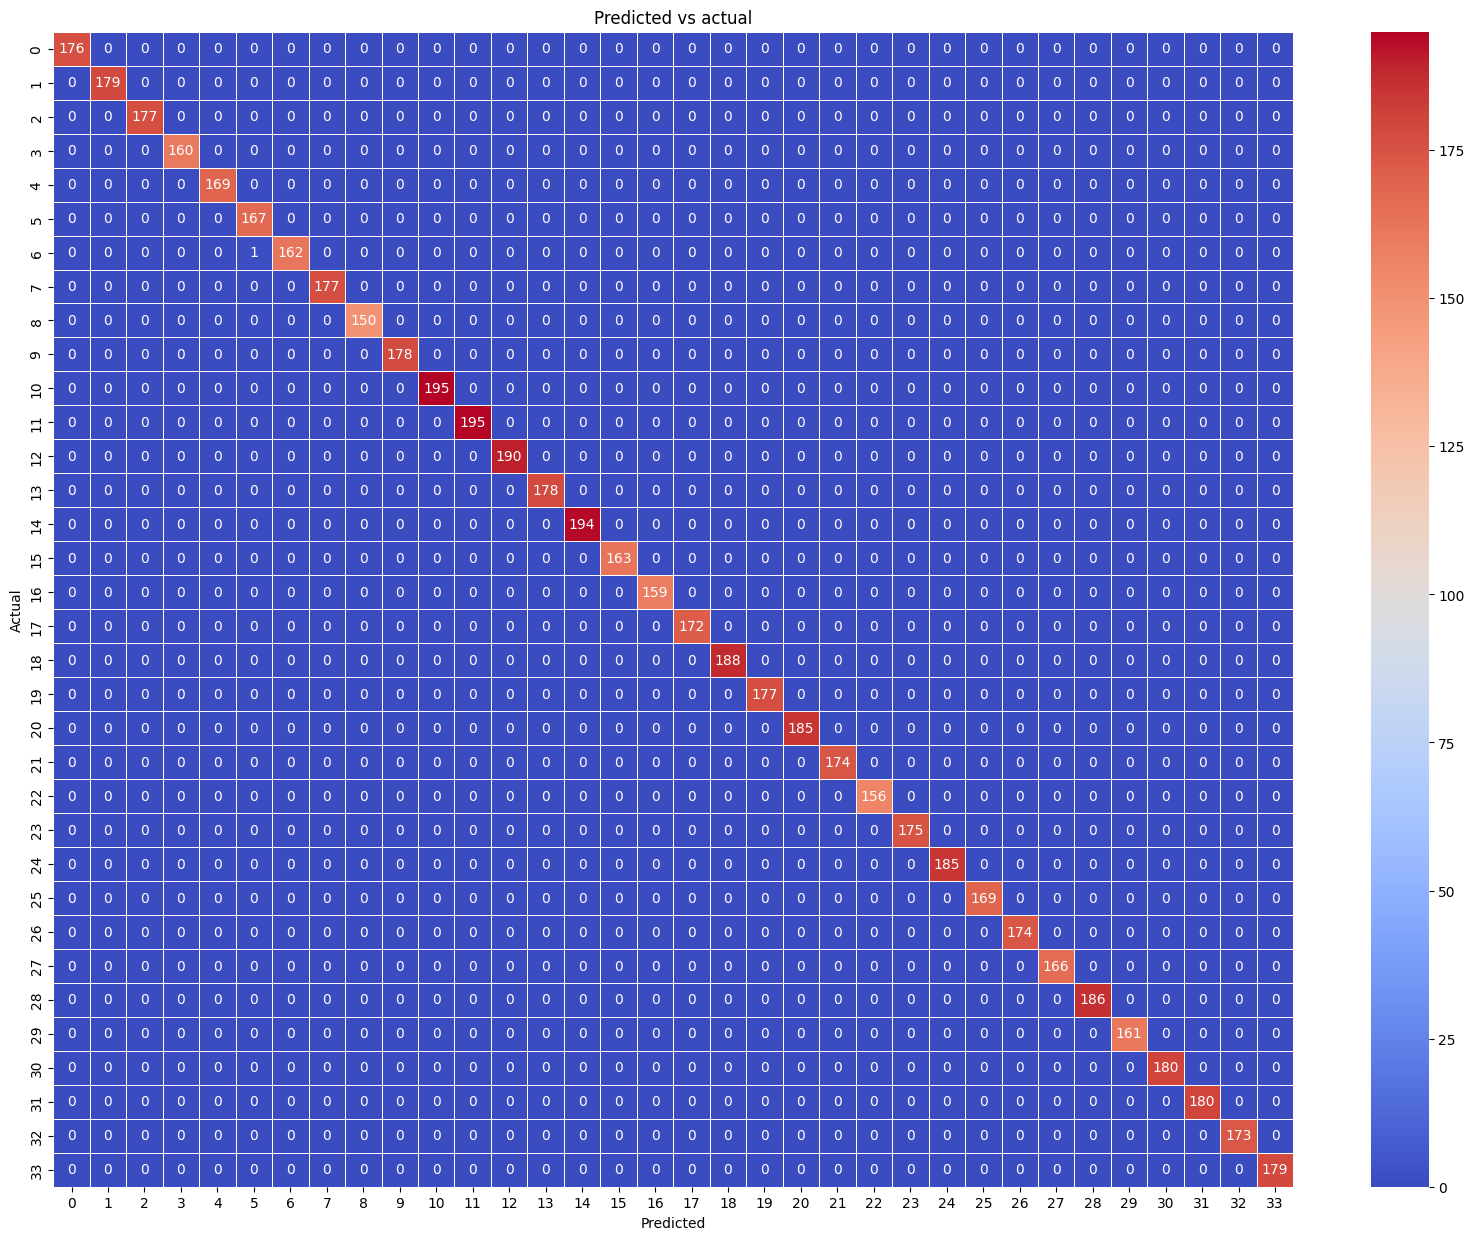

In [40]:
# Confusion Matrix
print('Confusion Matrix:')
base_logReg = confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(base_logReg, annot=True, linewidth=0.5, fmt=".0f",cmap='coolwarm', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()

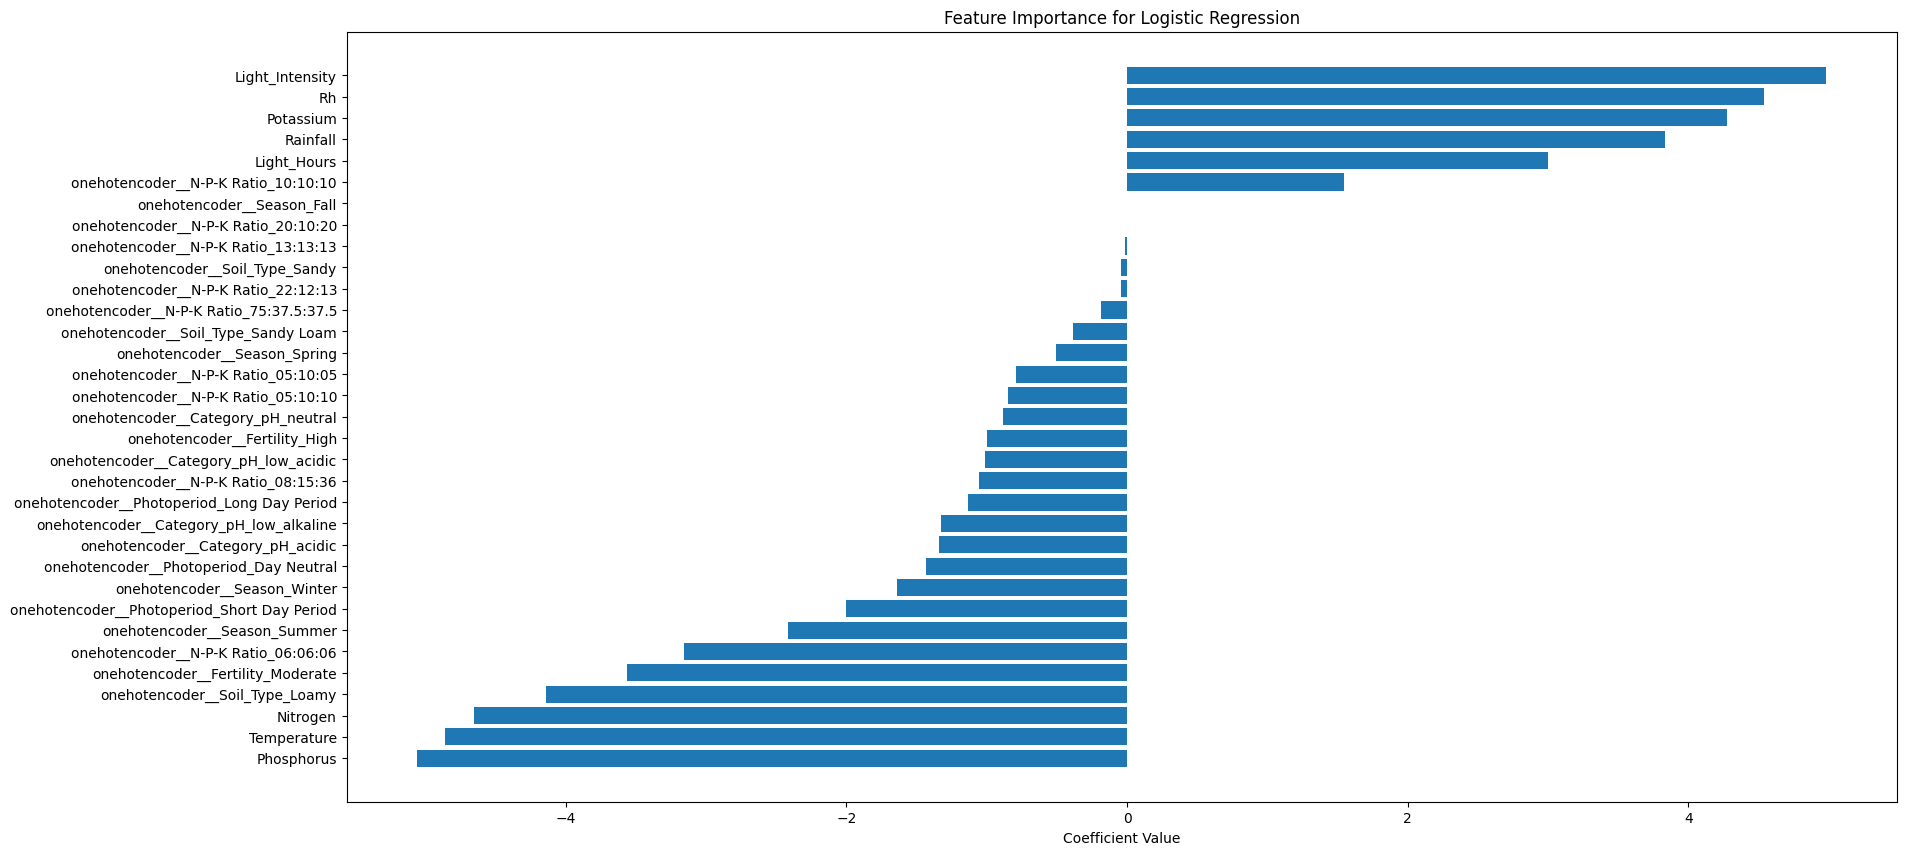

In [46]:
coefficients = model.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': X_data.columns,
    'Importance': coefficients
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 10))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance for Logistic Regression')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

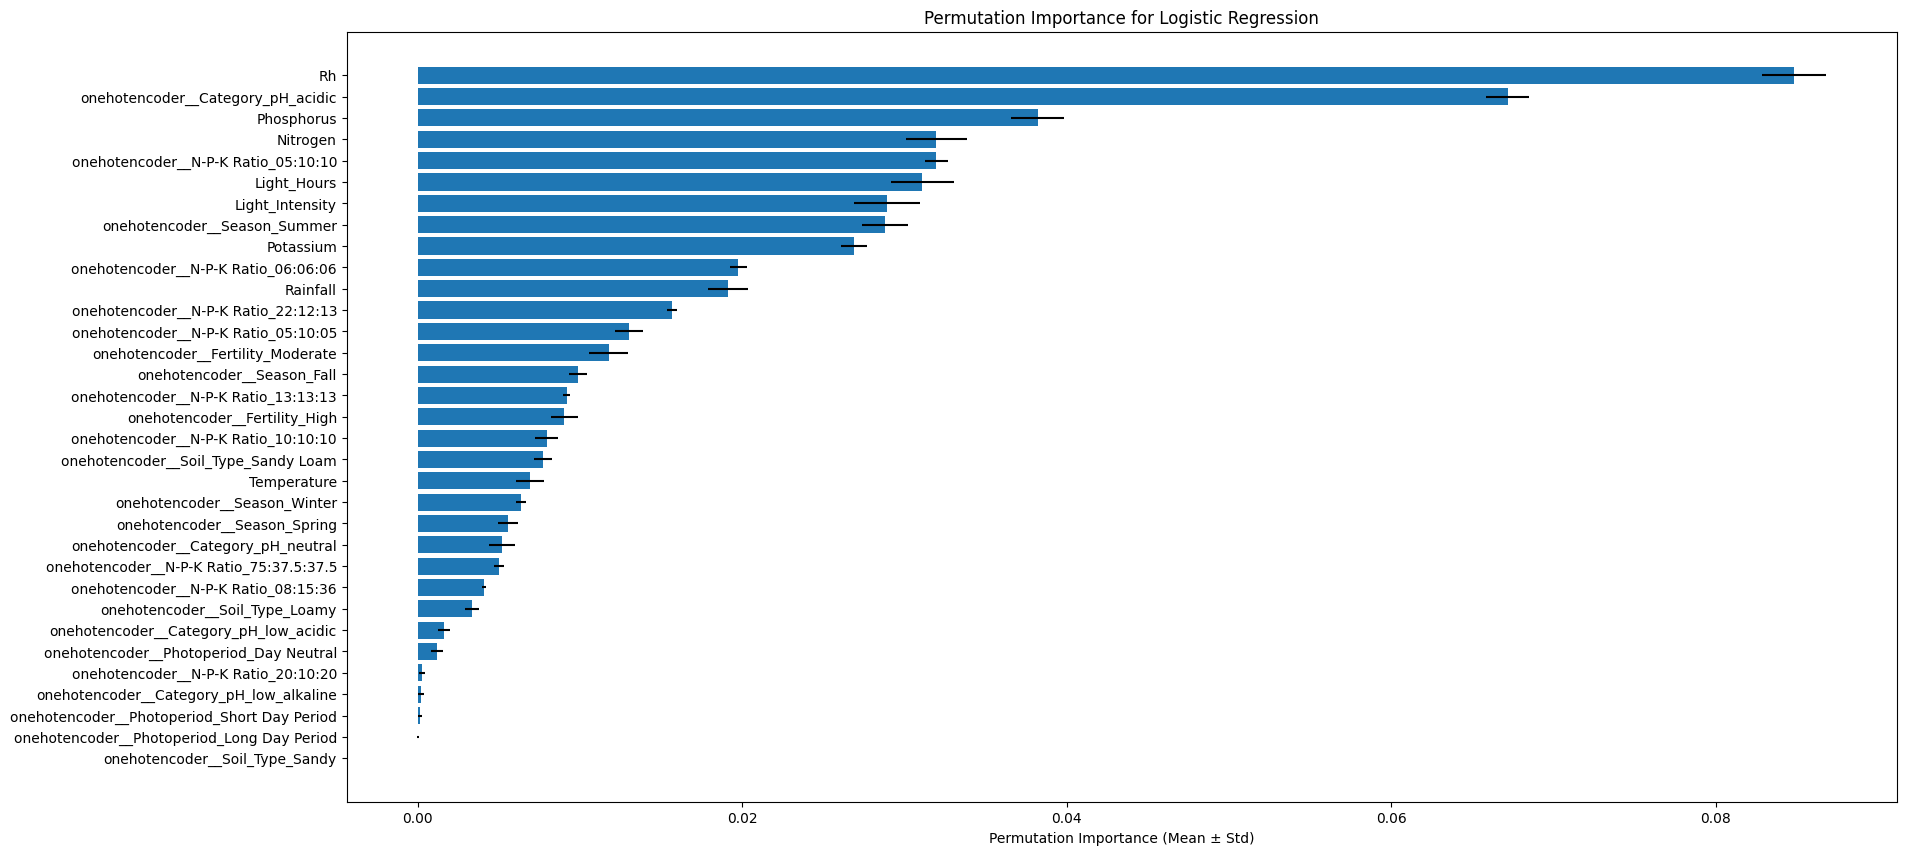

In [45]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

feature_importance = pd.DataFrame({
    'Feature': X_data.columns,
    'Importance Mean': perm_importance.importances_mean,
    'Importance Std': perm_importance.importances_std
})

feature_importance = feature_importance.sort_values(by='Importance Mean', ascending=False)


plt.figure(figsize=(20, 10))
plt.barh(feature_importance['Feature'], feature_importance['Importance Mean'], xerr=feature_importance['Importance Std'])
plt.xlabel('Permutation Importance (Mean ± Std)')
plt.title('Permutation Importance for Logistic Regression')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

In [54]:
import timeit

# Define a function for prediction
def model_predict():
    model.predict(X_test.iloc[0:2])

# Measure time for predictions
elapsed_time = timeit.timeit(model_predict, number=1)

print(f"Time taken for prediction: {elapsed_time:.6f} seconds")

Time taken for prediction: 0.015062 seconds


In [53]:
X_test.iloc[0:2]

,onehotencoder__Fertility_High,onehotencoder__Fertility_Moderate,onehotencoder__Photoperiod_Day Neutral,onehotencoder__Photoperiod_Long Day Period,onehotencoder__Photoperiod_Short Day Period,onehotencoder__N-P-K Ratio_05:10:05,onehotencoder__N-P-K Ratio_05:10:10,onehotencoder__N-P-K Ratio_06:06:06,onehotencoder__N-P-K Ratio_08:15:36,onehotencoder__N-P-K Ratio_10:10:10,...,onehotencoder__Season_Summer,onehotencoder__Season_Winter,Temperature,Rainfall,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium
9092,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.520302,0.252795,0.725928,0.219691,0.887510,0.359480,0.059201,0.316794
2222,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.298430,0.423810,0.544036,0.275468,0.205298,0.170601,0.240871,0.117566


###Checking for Overfitting of the model


In [47]:
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy}')

Training Accuracy: 0.9995518207282913


In [48]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=10)

print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

Cross-validation scores: [0.99887955 0.99943978 1.         1.         0.99943978 1.
 0.99943978 1.         1.         0.99943978]
Mean cross-validation score: 0.9996638655462184


->Performing well on the unseen dataset during training the model.

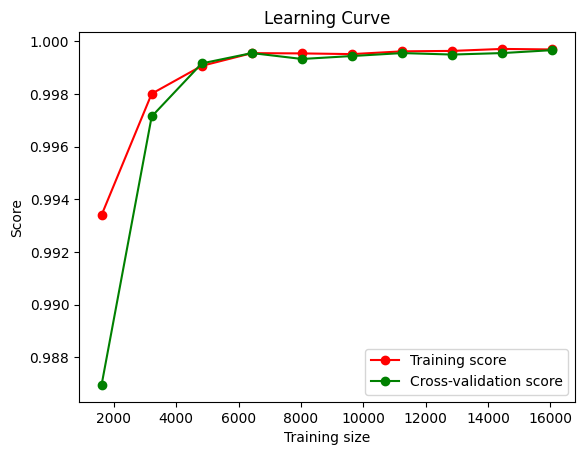

In [49]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    LogisticRegression(), X_train, y_train, cv=10, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

In [57]:
from sklearn.linear_model import LogisticRegression

# Use L2 regularization (Ridge)
model_reg = LogisticRegression(penalty='l2', C=1.0)  # C is the inverse of regularization strength
model_reg.fit(X_train, y_train)

train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.9995518207282913
Test Accuracy: 0.9998319327731092


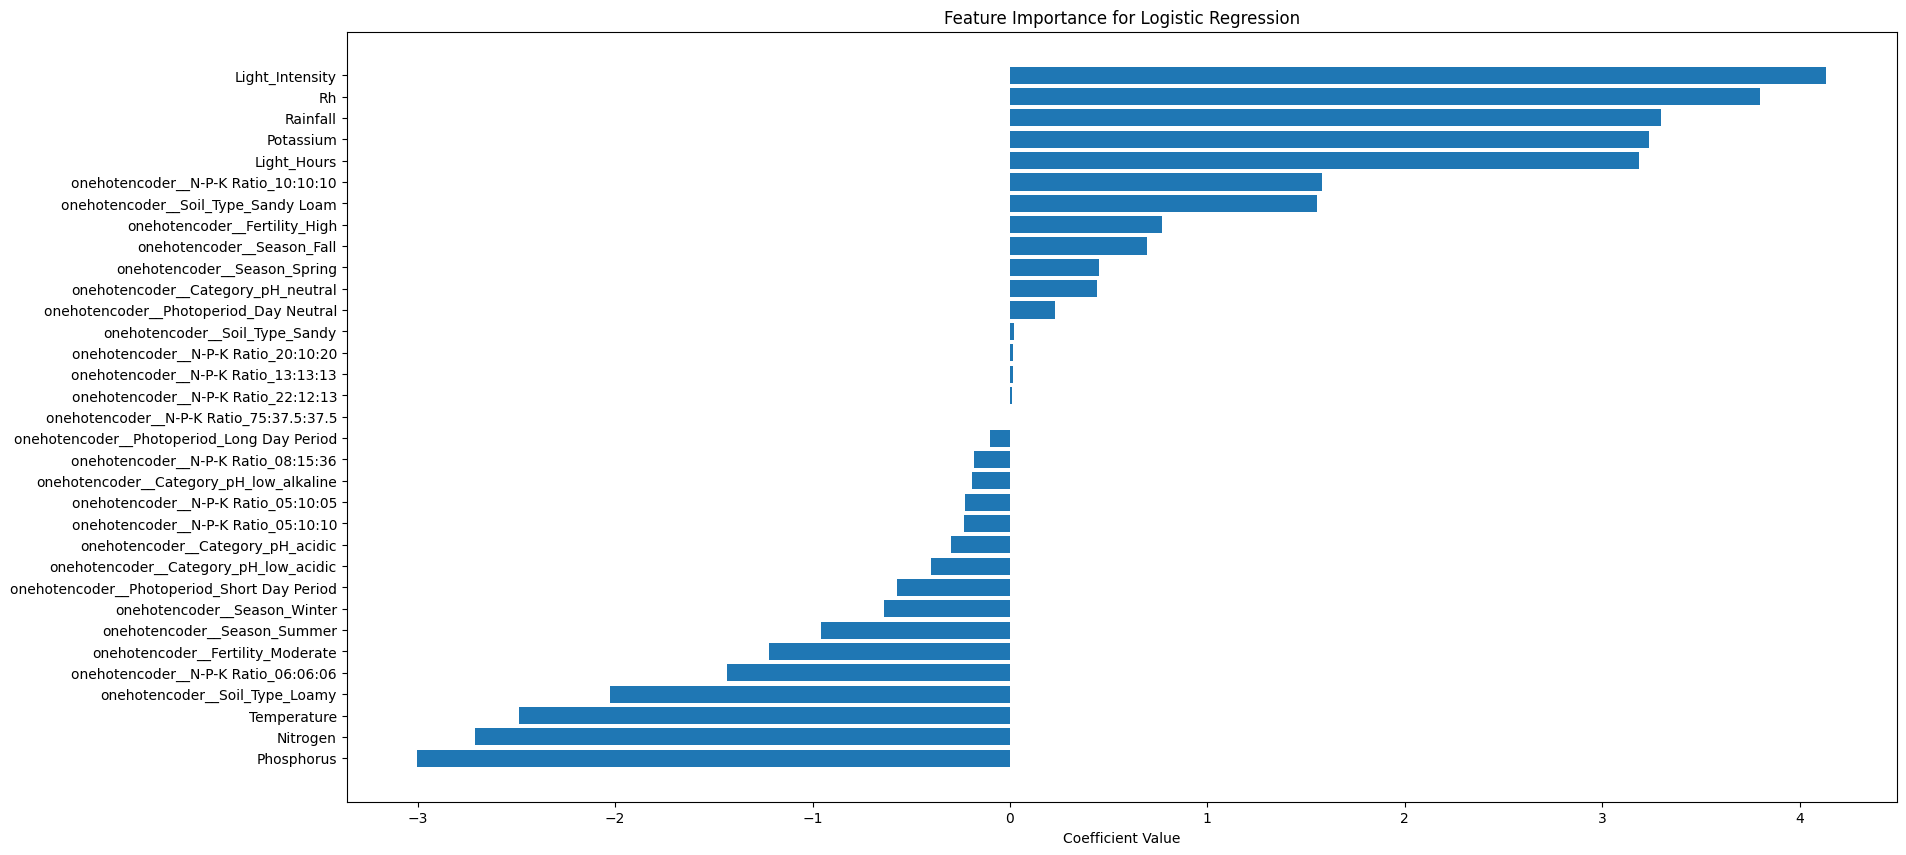

In [58]:
coefficients = model_reg.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': X_data.columns,
    'Importance': coefficients
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 10))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance for Logistic Regression')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

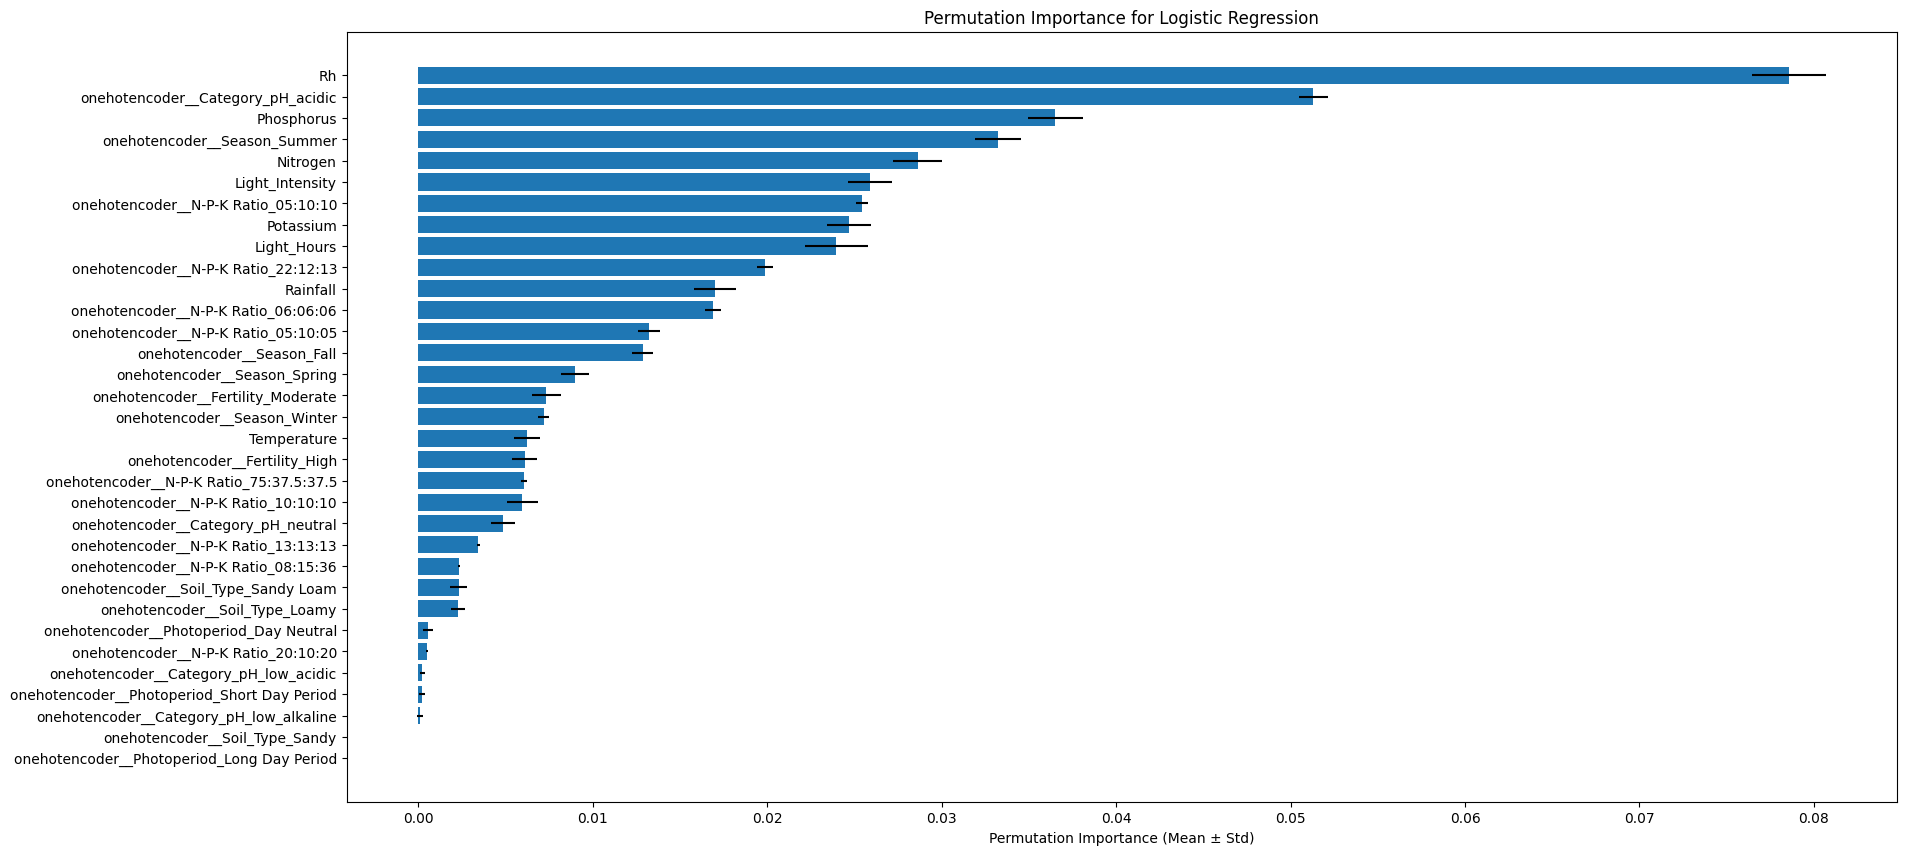

In [59]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model_reg, X_test, y_test, n_repeats=10, random_state=42)

feature_importance = pd.DataFrame({
    'Feature': X_data.columns,
    'Importance Mean': perm_importance.importances_mean,
    'Importance Std': perm_importance.importances_std
})

feature_importance = feature_importance.sort_values(by='Importance Mean', ascending=False)


plt.figure(figsize=(20, 10))
plt.barh(feature_importance['Feature'], feature_importance['Importance Mean'], xerr=feature_importance['Importance Std'])
plt.xlabel('Permutation Importance (Mean ± Std)')
plt.title('Permutation Importance for Logistic Regression')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

No effect of regularization. This could tell us there is no overfitting of the data.